### Steps for this Analysis

* Define the problem
* Collect Data
* Data Inspection
* Exploratory Data Analysis
* Feature Engineering
* Model Selection, Training, and Validation
* Model Evaluation
* Model Tuning

* Accent Bank also known as AB PLC is an abstract multinational financial services group, that offers retail and investment banking, pension management, asset management, and payments services, headquartered in Washington, United States. Accent Bank wants to build a machine-learning model to predict online payment fraud.

Problem statement: How will the business benefit from your solution?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"C:\Users\User\Desktop\Data analytics\Python Assignments\Online Payment Fraud Detection (1).csv")

In [3]:
df.head()

,step_hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
df.shape

(1048575, 10)

In [5]:
df.count()

step_hour                1048575
type_of_trans            1048575
amount_trans             1048575
customer_start_trans     1048575
old_balance              1048575
new_balance              1048575
recipient_desc           1048575
initial_bal_recipient    1048575
new_bal_recipient        1048575
is_fraud                 1048575
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   step_hour              1048575 non-null  int64  
 1   type_of_trans          1048575 non-null  object 
 2   amount_trans           1048575 non-null  float64
 3   customer_start_trans   1048575 non-null  object 
 4   old_balance            1048575 non-null  float64
 5   new_balance            1048575 non-null  float64
 6   recipient_desc         1048575 non-null  object 
 7   initial_bal_recipient  1048575 non-null  float64
 8   new_bal_recipient      1048575 non-null  float64
 9   is_fraud               1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,step_hour,amount_trans,old_balance,new_balance,initial_bal_recipient,new_bal_recipient,is_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [9]:
df['type_of_trans'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type_of_trans, dtype: int64

In [10]:
df['customer_start_trans'].nunique()

1048317

In [11]:
df['recipient_desc'].nunique()

449635

In [12]:
df.head()

,step_hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


### Create new columns to verify if the difference between old and new balance equals actual amount transfered

In [13]:
df['oldnew']=df['old_balance']-df['new_balance']

In [14]:
df.head()

,step_hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud,oldnew
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,181.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,11668.14


In [15]:
df['actual'] = (df['amount_trans'] - df['oldnew']).astype(int)

In [16]:
df.head()

,step_hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud,oldnew,actual
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,9839.64,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1864.28,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,181.00,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,181.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,11668.14,0


In [17]:
df.sort_values('actual', ascending= False)

,step_hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud,oldnew,actual
84416,10,TRANSFER,6419835.27,C890128330,31784.0,0.00,C1192472312,0.00,6691744.85,0,31784.00,6388051
66040,9,TRANSFER,6072832.27,C2022065686,1344.0,0.00,C460989529,162174.09,9174785.39,0,1344.00,6071488
750720,38,TRANSFER,5860862.89,C2029028599,0.0,0.00,C650698620,6883070.95,12700000.00,0,0.00,5860862
16720,8,TRANSFER,5677662.29,C293394374,0.0,0.00,C1856036778,8427389.99,13700000.00,0,0.00,5677662
714513,37,TRANSFER,5596359.95,C1979948351,0.0,0.00,C1767067167,10500000.00,15800000.00,0,0.00,5596359
...,...,...,...,...,...,...,...,...,...,...,...,...
1030559,72,TRANSFER,10000000.00,C53057884,18600000.0,8594065.09,C588547519,0.00,0.00,1,10005934.91,-5934
586311,33,TRANSFER,10000000.00,C1439740840,19900000.0,9887819.06,C875288652,0.00,0.00,1,10012180.94,-12180
1030661,82,TRANSFER,10000000.00,C1237313447,11000000.0,987591.59,C1468356154,0.00,0.00,1,10012408.41,-12408
481250,19,TRANSFER,10000000.00,C416779475,11900000.0,1861008.32,C380259496,0.00,0.00,1,10038991.68,-38991


In [18]:
df['actual'].nunique()

408911

# Exploratory Data Analysis

### Univariate Analysis

In [19]:
# Distribution of transfer types

In [20]:
transfer_types = df['type_of_trans'].value_counts()
transfer_types

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type_of_trans, dtype: int64

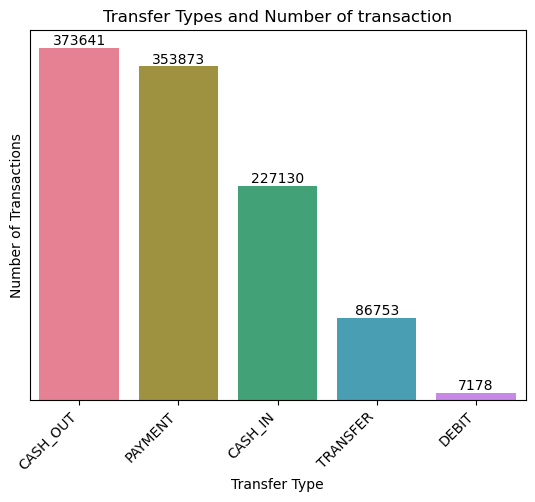

In [21]:
# Define custom colors for each transfer type
custom_colors = sns.color_palette('husl', n_colors=len(transfer_types))

# Create a bar plot
ax=sns.barplot(x=transfer_types.index, y=transfer_types.values, palette=custom_colors)

# Customize the plot
plt.title('Transfer Types and Number of transaction')
plt.xlabel('Transfer Type')
plt.ylabel('Number of Transactions')


# Remove y-axis values
ax.set_yticks([])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for i, v in enumerate(transfer_types.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
    
# Show the plot
plt.show()

* The majority of transactions involve payments (353,873), followed by cash withdrawals (373,641) and cash deposits (227,130). Transfers (86,753) and debits (7,178) represent smaller proportions in the overall transaction activity.

In [22]:
Fraud_composition=df['is_fraud'].value_counts()

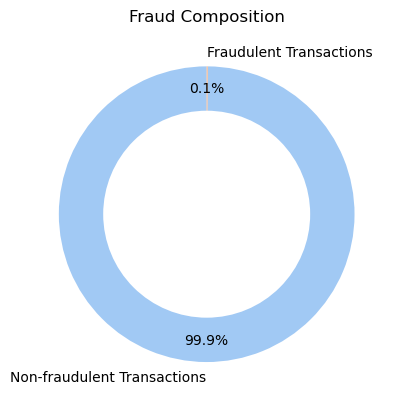

In [23]:
# Assuming df['is_fraud'] contains the information about fraud (1) and non-fraud (0)
fraud_composition = df['is_fraud'].value_counts()

# Define custom colors for each category
custom_colors = sns.color_palette('pastel', n_colors=len(fraud_composition))

# Create a pie chart
plt.pie(fraud_composition, labels=['Non-fraudulent Transactions', 'Fraudulent Transactions'], autopct='%1.1f%%', colors=custom_colors, startangle=90, pctdistance=0.85)

# Draw circle in the center of the pie to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Customize the plot
plt.title('Fraud Composition')

# Show the plot
plt.show()

* Out of 1,048,575 total transactions, only 1,142 (0.1%) are identified as fraudulent, highlighting the rarity of fraudulent occurrences.

In [24]:
# Distribution of Fraudulent transactions

In [25]:
fraud = df.loc[df['is_fraud'] ==1]
fraud

,step_hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud,oldnew,actual
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,181.00,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,181.00,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,2806.00,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,2806.00,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,20128.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1,56745.14,0
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1,33676.59,0
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1,33676.59,0
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1,87999.25,0


In [26]:
dist_fraud= fraud['type_of_trans'].value_counts()
dist_fraud

CASH_OUT    578
TRANSFER    564
Name: type_of_trans, dtype: int64

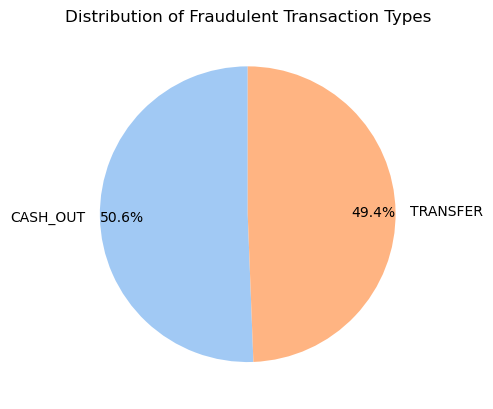

In [27]:
# Assuming fraud['type_of_trans'] contains information about transaction types in fraudulent activities
dist_fraud = fraud['type_of_trans'].value_counts()

# Define custom colors for each transaction type
custom_colors = sns.color_palette('pastel', n_colors=len(dist_fraud))

# Create a pie chart
plt.pie(dist_fraud, labels=dist_fraud.index, autopct='%1.1f%%', colors=custom_colors, startangle=90, pctdistance=0.85)

# Customize the plot
plt.title('Distribution of Fraudulent Transaction Types')

# Show the plot
plt.show()

* The number of CASH_OUT transactions is 578, closely followed by 564 TRANSFER transactions, suggesting a significant proportion of financial fraudulent activities involving cash outflows and transfers

In [28]:
# Distribution of Non-fraudulent transactions

In [29]:
nonfraud = df.loc[df['is_fraud'] ==0]
nonfraud

,step_hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud,oldnew,actual
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,9839.64,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,1864.28,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,11668.14,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,7817.71,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,7107.77,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,132557.35,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,9917.36,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,14140.05,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,10020.05,0


In [30]:
dist_nonfraud= nonfraud['type_of_trans'].value_counts()
dist_nonfraud

CASH_OUT    373063
PAYMENT     353873
CASH_IN     227130
TRANSFER     86189
DEBIT         7178
Name: type_of_trans, dtype: int64

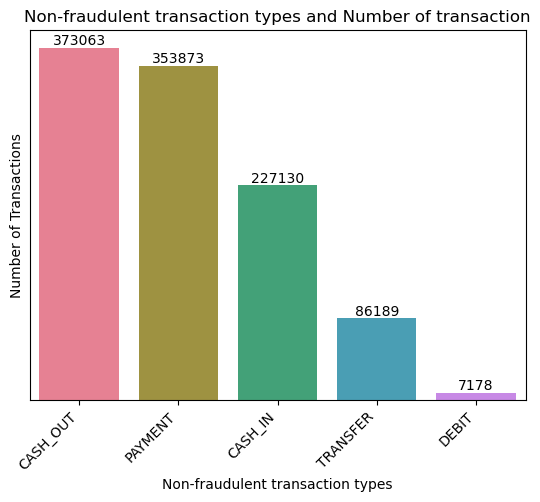

In [31]:
# Define custom colors for each transfer type
custom_colors = sns.color_palette('husl', n_colors=len(dist_nonfraud))

# Create a bar plot
ax=sns.barplot(x=dist_nonfraud.index, y=dist_nonfraud.values, palette=custom_colors)

# Customize the plot
plt.title('Non-fraudulent transaction types and Number of transaction')
plt.xlabel('Non-fraudulent transaction types')
plt.ylabel('Number of Transactions')


# Remove y-axis values
ax.set_yticks([])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for i, v in enumerate(dist_nonfraud.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
    
# Show the plot
plt.show()

* Out of all financial transactions, CASH_OUT is the most frequent, occurring 373,063 times. PAYMENT transactions are close behind at 353,873 occurrences. CASH_IN and TRANSFER transactions are also quite common, with 227,130 and 86,189 instances respectively. DEBIT transactions, on the other hand, are much less frequent, with only 7,178 occurrences.

In [32]:
# Distribution of step_hour

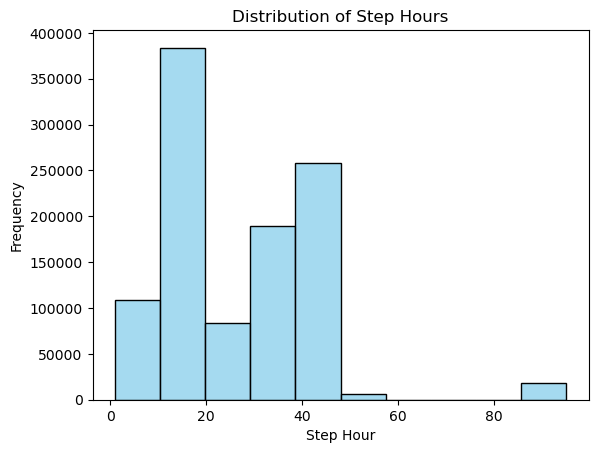

In [33]:
# Assuming df is your DataFrame and 'step_hour' is the column of interest
sns.histplot(df['step_hour'], bins=10, color='skyblue', stat='count', kde=False)

# Display frequency values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Customize the plot
plt.title('Distribution of Step Hours')
plt.xlabel('Step Hour')
plt.ylabel('Frequency')  # Remove y-axis label

# Show the plot
plt.show()

In [34]:
# subplot/pairplot of some numerical columns

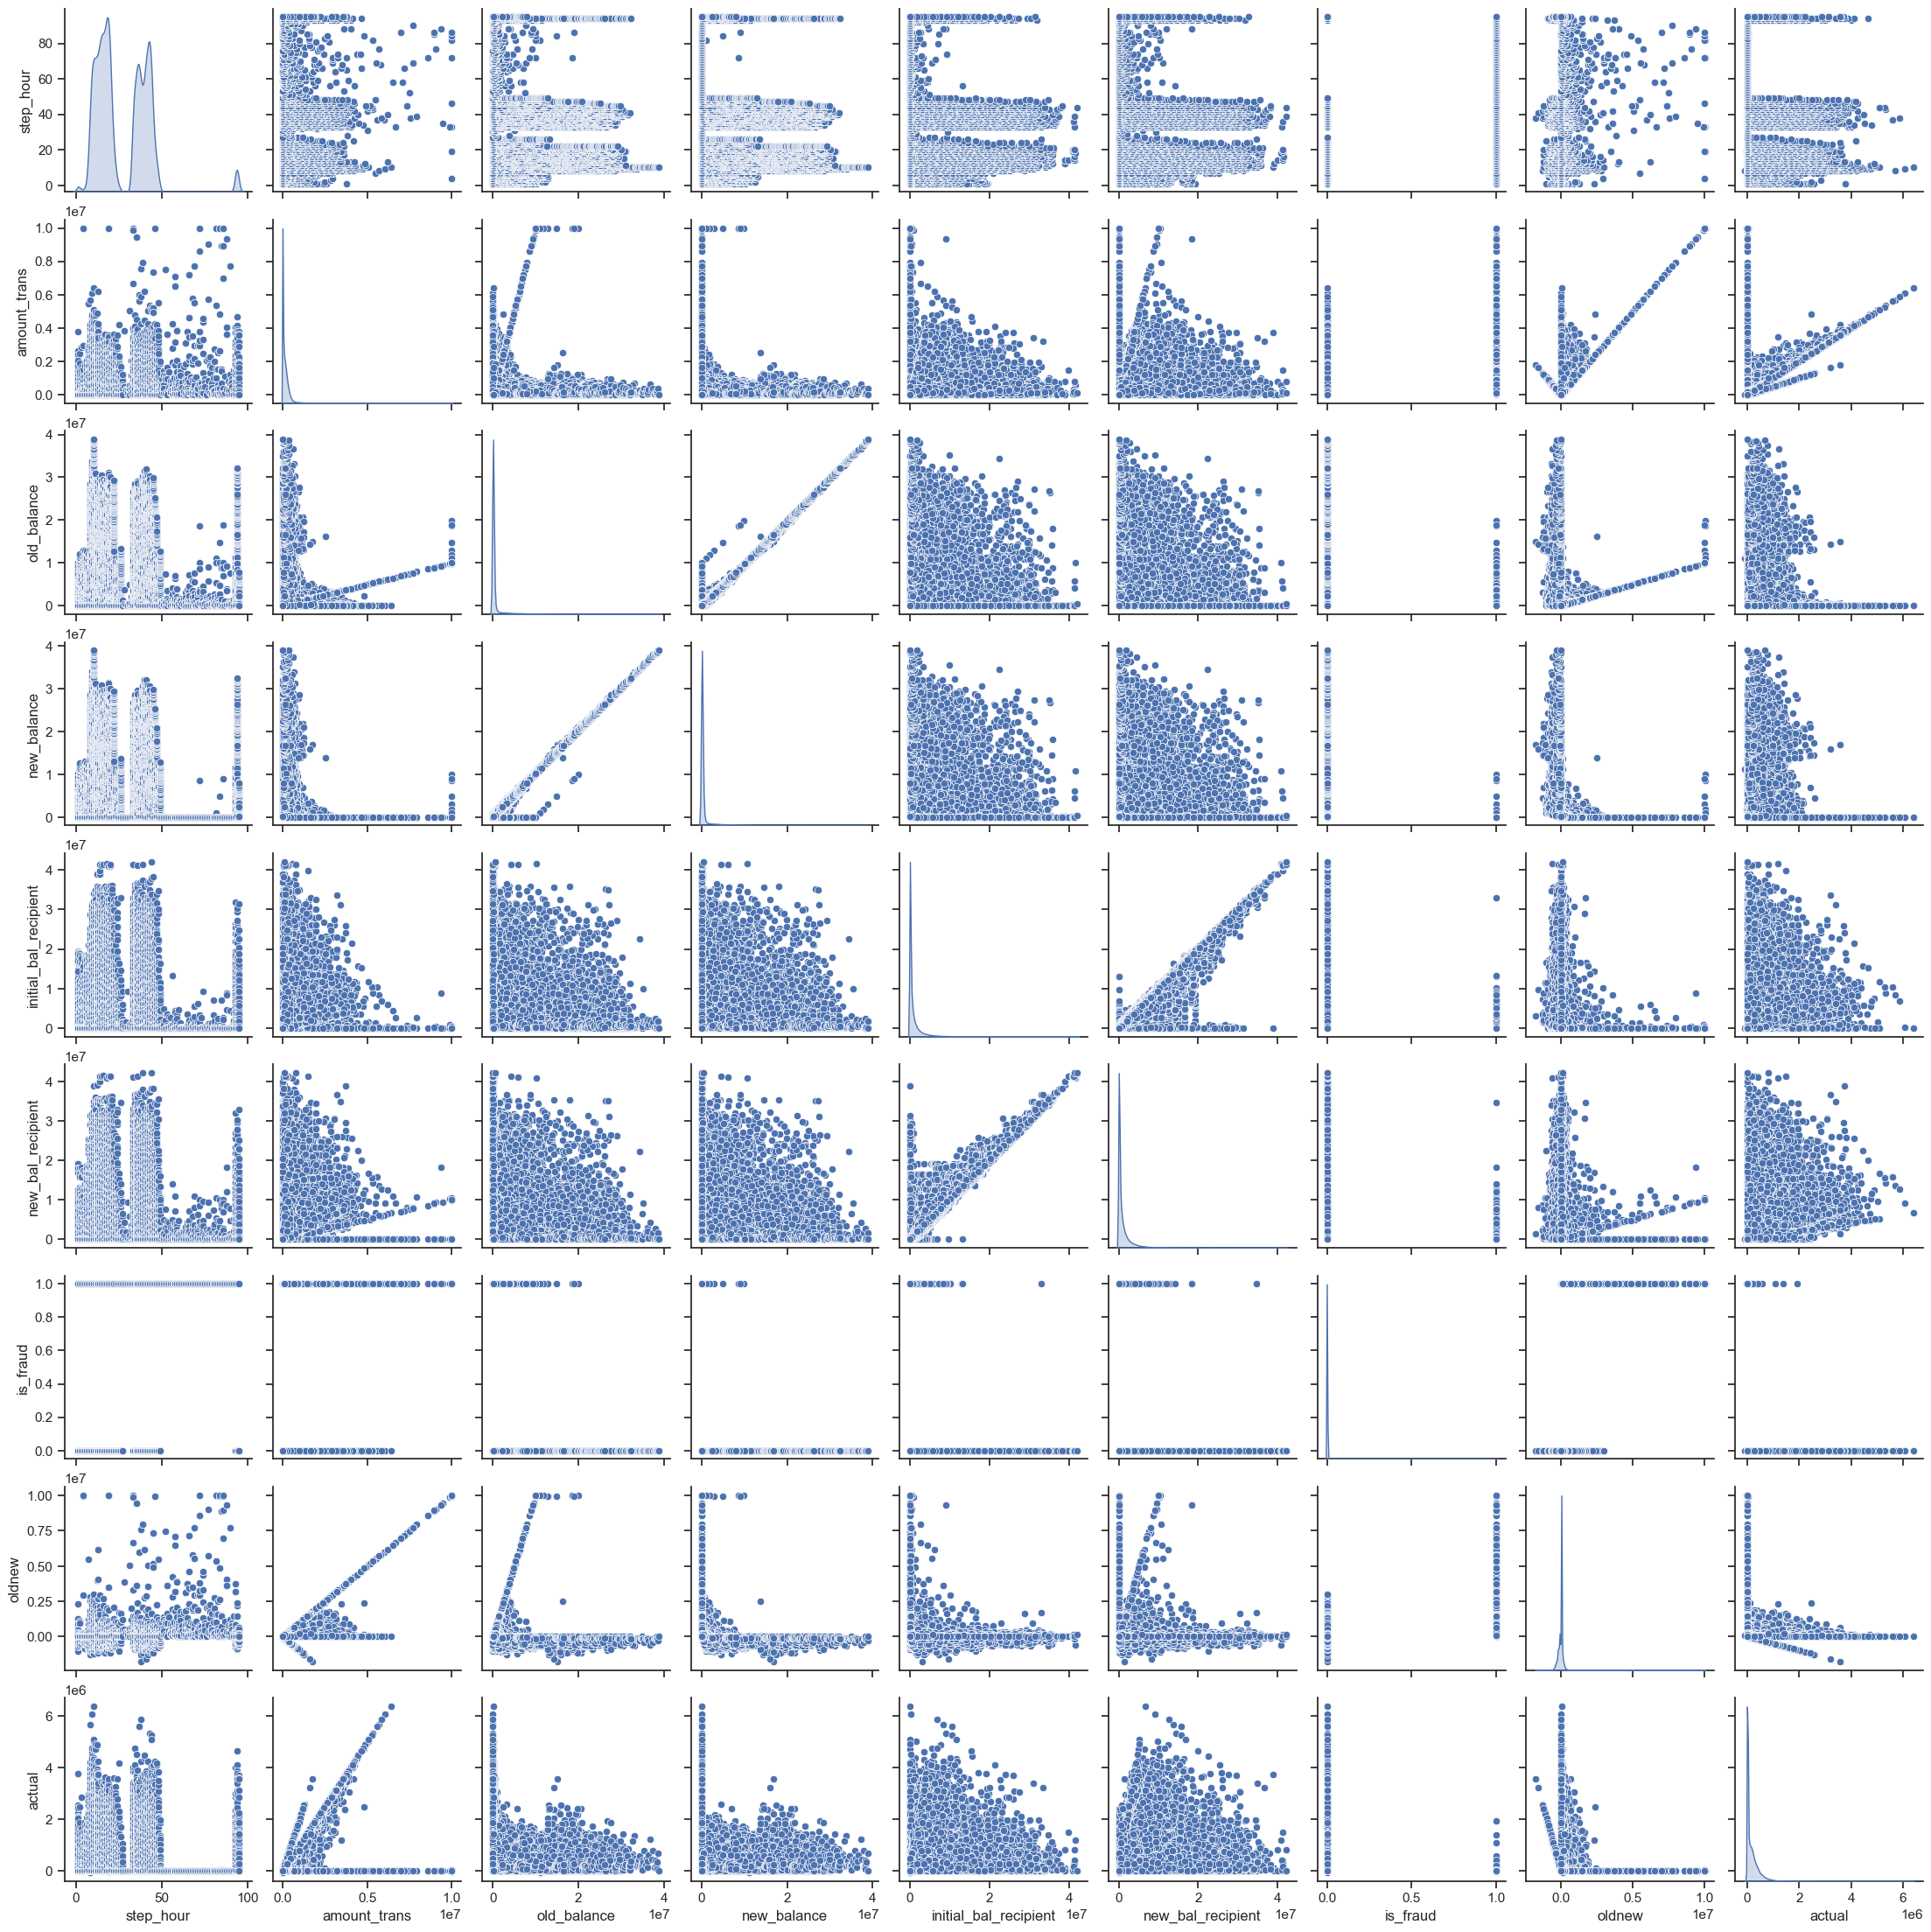

In [35]:
# Assuming df is your DataFrame
sns.set(style="ticks")
sns.pairplot(df, diag_kind='kde')  # Use diag_kind='hist' if you prefer histograms on the diagonal

# Show the plot
plt.show()

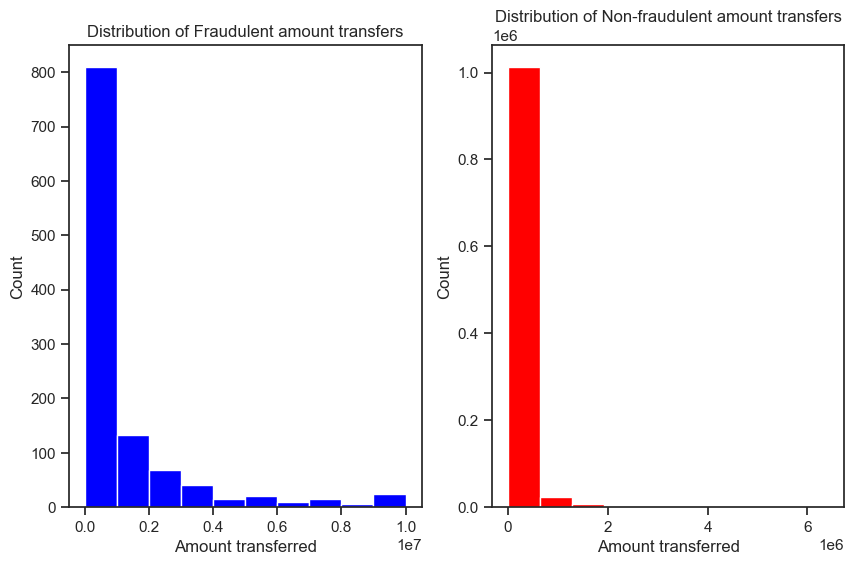

In [36]:
# Distribution of fraudulent and non-fraudulent amount transfers
# Create a subplots for the distribution of fraudulent and non-fraudulent amount transfers
fig, axs = plt.subplots(1, 2, figsize = (10, 6))

# customize subplot 1 - Fraudulent amount transfers
axs[0].hist(fraud['amount_trans'], bins = 10, color = 'blue')
axs[0].set_title('Distribution of Fraudulent amount transfers')
axs[0].set_xlabel('Amount transferred')
axs[0].set_ylabel('Count')

# customize subplot 2 - Non-fraudulent amount transfers
axs[1].hist(nonfraud['amount_trans'], bins = 10, color = 'red')
axs[1].set_title('Distribution of Non-fraudulent amount transfers')
axs[1].set_xlabel('Amount transferred')
axs[1].set_ylabel('Count')

# display the plot
plt.show()

### Bivariate Analysis

In [37]:
df.head()

,step_hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud,oldnew,actual
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,9839.64,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1864.28,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,181.00,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,181.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,11668.14,0


In [38]:
# sum of amount transferred by type of transaction
sum_trans = df.groupby ('type_of_trans') ['amount_trans'].sum().sort_values(ascending=False)
sum_trans

type_of_trans
CASH_OUT    6.876474e+10
TRANSFER    5.503644e+10
CASH_IN     3.859476e+10
PAYMENT     3.936097e+09
DEBIT       4.219599e+07
Name: amount_trans, dtype: float64

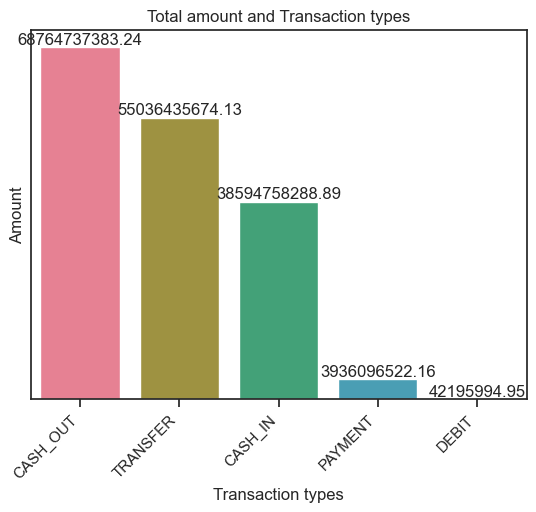

In [39]:
# Define custom colors for each transfer type
custom_colors = sns.color_palette('husl', n_colors=len(sum_trans))

# Create a bar plot
ax=sns.barplot(x=sum_trans.index, y=sum_trans.values, palette=custom_colors)

# Customize the plot
plt.title('Total amount and Transaction types')
plt.xlabel('Transaction types')
plt.ylabel('Amount')


# Remove y-axis values
ax.set_yticks([])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for i, v in enumerate(sum_trans.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
    
# Show the plot
plt.show()

* CASH_OUT transactions dominate with a total value of approximately $68.76 billion, followed by TRANSFER transactions at $55.04 billion. CASH_IN and PAYMENT transactions have lower values at around $38.59 billion and $3.94 billion, respectively. DEBIT transactions represent the smallest portion with a total value of approximately $42.2 million.

In [40]:
# Average amount transferred by type of transaction
avg_trans = df.groupby ('type_of_trans') ['amount_trans'].mean().astype('int').sort_values(ascending=False)
avg_trans

type_of_trans
TRANSFER    634403
CASH_OUT    184039
CASH_IN     169923
PAYMENT      11122
DEBIT         5878
Name: amount_trans, dtype: int32

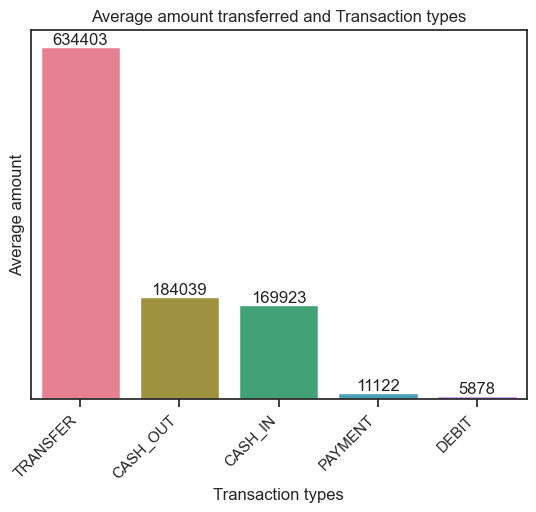

In [41]:
# Define custom colors for each transfer type
custom_colors = sns.color_palette('husl', n_colors=len(avg_trans))

# Create a bar plot
ax=sns.barplot(x=avg_trans.index, y=avg_trans.values, palette=custom_colors)

# Customize the plot
plt.title('Average amount transferred and Transaction types')
plt.xlabel('Transaction types')
plt.ylabel('Average amount')


# Remove y-axis values
ax.set_yticks([])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for i, v in enumerate(avg_trans.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
    
# Show the plot
plt.show()

* TRANSFER reigns supreme with an average of 634,403 instances, it far surpasses all other transaction types. CASH_OUT comes next with 184,039 average instances, followed by CASH_IN with 169,923 and PAYMENT with 11,122 average instances. DEBIT transactions, on the other hand, are significantly less frequent, with only 5,878 average occurrences.

In [42]:
# Number of transaction by type of transaction
num_trans = df.groupby ('type_of_trans') ['amount_trans'].count().astype('int').sort_values(ascending=False)
num_trans

type_of_trans
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: amount_trans, dtype: int32

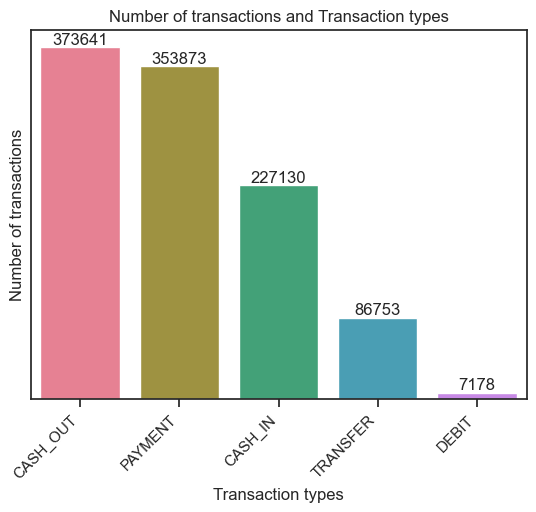

In [43]:
# Define custom colors for each transfer type
custom_colors = sns.color_palette('husl', n_colors=len(num_trans))

# Create a bar plot
ax=sns.barplot(x=num_trans.index, y=num_trans.values, palette=custom_colors)

# Customize the plot
plt.title('Number of transactions and Transaction types')
plt.xlabel('Transaction types')
plt.ylabel('Number of transactions')


# Remove y-axis values
ax.set_yticks([])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for i, v in enumerate(num_trans.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
    
# Show the plot
plt.show()

* The most frequent transaction type is "CASH_OUT" with 373,641 occurrences, followed closely by "PAYMENT" at 353,873. "TRANSFER" transactions rank third with 86,753 instances, while "DEBIT" transactions are the least common, occurring 7,178 times

In [44]:
# sum of amount transferred by type of fraudulent transaction
sum_ftrans = fraud.groupby ('type_of_trans') ['amount_trans'].sum().sort_values(ascending=False)
sum_ftrans

type_of_trans
TRANSFER    6.815984e+08
CASH_OUT    6.803839e+08
Name: amount_trans, dtype: float64

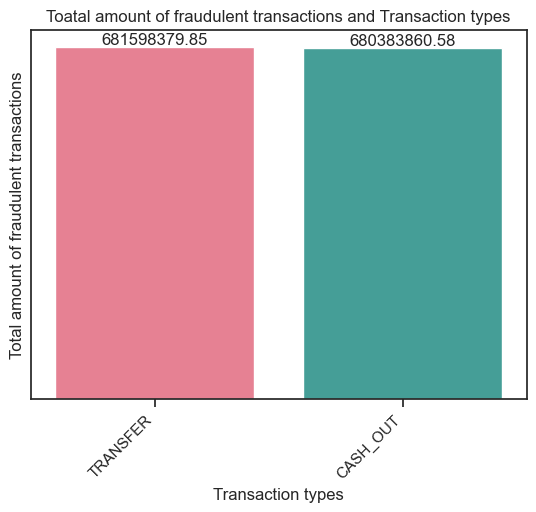

In [45]:
# Define custom colors for each transfer type
custom_colors = sns.color_palette('husl', n_colors=len(sum_ftrans))

# Create a bar plot
ax=sns.barplot(x=sum_ftrans.index, y=sum_ftrans.values, palette=custom_colors)

# Customize the plot
plt.title('Toatal amount of fraudulent transactions and Transaction types')
plt.xlabel('Transaction types')
plt.ylabel('Total amount of fraudulent transactions')


# Remove y-axis values
ax.set_yticks([])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for i, v in enumerate(sum_ftrans.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
    
# Show the plot
plt.show()

 "TRANSFER" transactions and "CASH_OUT" transactions dominate fraudulent transactions with 681,598,400 and 680,383,900, respectively.

In [46]:
# Average amount transferred by type of fraudulent transaction

In [47]:
avg_ftrans = fraud.groupby ('type_of_trans') ['amount_trans'].mean().astype('int').sort_values(ascending=False)
avg_ftrans

type_of_trans
TRANSFER    1208507
CASH_OUT    1177134
Name: amount_trans, dtype: int32

* On the average, "TRANSFER" transactions and "CASH_OUT" transactions stand out with 1,208,507 and 1,177,134 occurrences, respectively.

In [48]:
# Number of transactions by type of fraudulent transaction
num_ftrans = fraud.groupby ('type_of_trans') ['amount_trans'].count().astype('int').sort_values(ascending=False)
num_ftrans

type_of_trans
CASH_OUT    578
TRANSFER    564
Name: amount_trans, dtype: int32

* "CASH_OUT" and "TRANSFER" are notable fradulent transactions with 578 and 564 occurrences respectively.

In [49]:
# sum of amount transferred by fraudulent and nonfraudulent transactions

In [50]:
sum_altrans = df.groupby ('is_fraud') ['amount_trans'].sum().sort_values(ascending=False)
sum_altrans

is_fraud
0    1.650122e+11
1    1.361982e+09
Name: amount_trans, dtype: float64

* Non-fraudulent transactions dominates with a substantial value of 165,012,200,000, overshadowing  Fraudulent transactions  which has a significantly lower value of 1,361,982,000

### Multivariate Analysis

In [51]:
df.head()

,step_hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud,oldnew,actual
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,9839.64,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1864.28,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,181.00,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,181.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,11668.14,0


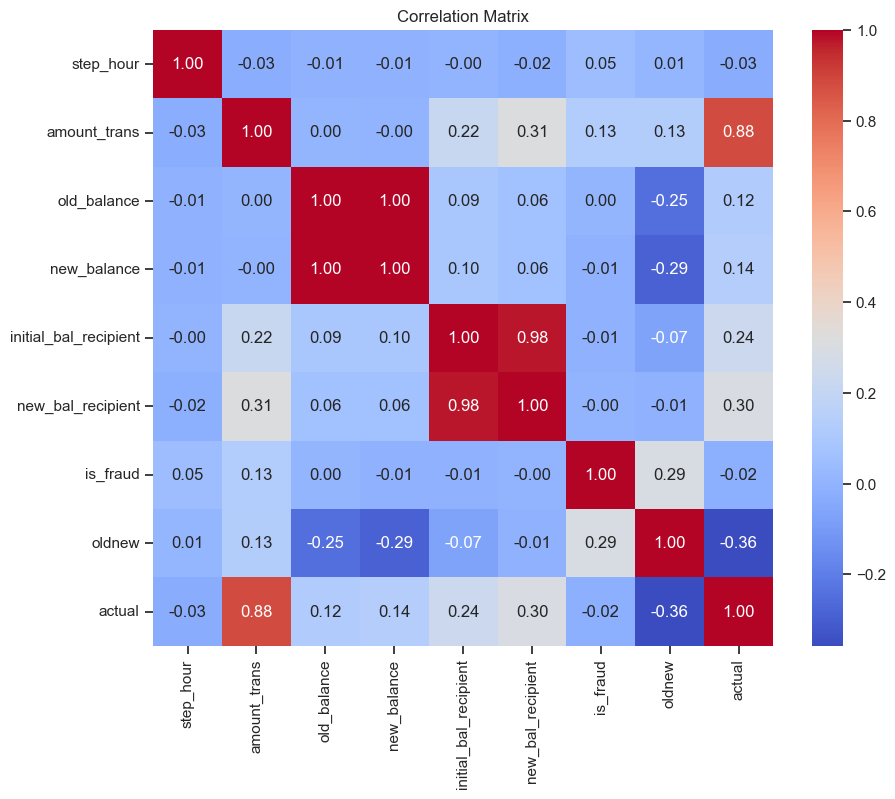

In [52]:
#Heatmap of amount transferred and old balance
# df = pd.DataFrame(data)

# Create a heatmap using Seaborn
corr_matrix = df[['step_hour','amount_trans','old_balance','new_balance','initial_bal_recipient','new_bal_recipient','is_fraud','oldnew','actual']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Old balance and new balance are postively correlated, initial balance recipient and new balance recipient are also positively correlated. Lastly, a positive relationship exist between amount transfered and actual

### Feature engineering

In [53]:
# Select target
y = df['is_fraud']

# Select the independent variables
X = df.drop(columns = 'is_fraud', axis = 1)

### Model selection
I will be using the following algorithms from scikit-learn to build machine learning models
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* Support Vector Machine
* XG Boost Classifier

### Label Encoding
This is to convert categorical columns to numerical before model building. So, i'll be applying label encoder on X variables

In [54]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoding to X variables
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for column in X.select_dtypes(include='object').columns:
    X[column] = label_encoder.fit_transform(X[column])

X.head()

,step_hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,oldnew,actual
0,1,3,9839.64,125164,170136.0,160296.36,274917,0.0,0.0,9839.64,0
1,1,3,1864.28,361319,21249.0,19384.72,286716,0.0,0.0,1864.28,0
2,1,4,181.00,165236,181.0,0.00,73550,0.0,0.0,181.00,0
3,1,1,181.00,961662,181.0,0.00,65464,21182.0,0.0,181.00,0
4,1,3,11668.14,567915,41554.0,29885.86,138001,0.0,0.0,11668.14,0


### Train-Test-Split
This is splitting X, and y into training set and testing using a ratio of 70-30; 70 is for training while 30 is for testing

In [55]:
# import the train_test_split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


         step_hour  type_of_trans  amount_trans  customer_start_trans  \
585327         33              1      59005.75                449079   
65578           9              3      19920.17                364959   

        old_balance  new_balance  recipient_desc  initial_bal_recipient  \
585327      20950.0         0.00           37679                    0.0   
65578       44496.0     24575.83          257445                    0.0   

        new_bal_recipient    oldnew  actual  
585327           59005.75  20950.00   38055  
65578                0.00  19920.17       0  

         step_hour  type_of_trans  amount_trans  customer_start_trans  \
444521         19              1        998.10                210935   
544116         21              1     152458.85                618206   

        old_balance  new_balance  recipient_desc  initial_bal_recipient  \
444521      41086.0      40087.9           28165                   0.00   
544116      14612.0          0.0           73938

In [56]:
X_train.shape

(734002, 11)

### Data Scaling (Standardization)
Data scaling, also known as data standardization, is a preprocessing step that transforms the features of a dataset to have a similar scale.

In [57]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


## Model training and evaluation

### Logistics Regression

In [58]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for logistic regression
from sklearn.metrics import accuracy_score

print(f'The accuracy of the logistic regression is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy of the logistic regression is 99.9%


### Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

dc_model = DecisionTreeClassifier()
dc_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dc_model.predict(X_test_scaled)

# print accuracy score for DecisionTree Classifier
from sklearn.metrics import accuracy_score
print(f'The accuracy of the decision tree classifier is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy of the decision tree classifier is 100.0%


### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(X_test_scaled)

print(f'The accuracy of the random forest classifier is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy of the random forest classifier is 100.0%


### Support Vector Machines(SVMs)

In [64]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = svm_model.predict(X_test_scaled)

print(f'The accuracy of the support vector machine is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy of the support vector machine is 99.9%


### XGBoost Classifier

In [66]:
!pip install xgboost

In [67]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = xgb_model.predict(X_test_scaled)

print(f'The accuracy of the xgb classifier is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy of the xgb classifier is 100.0%


### Model Evaluation¶
This is the evaluation of the models using classification reports and confusion matrices

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   non_fraud      0.999     1.000     1.000    314230
    is_fraud      0.882     0.370     0.522       343

    accuracy                          0.999    314573
   macro avg      0.941     0.685     0.761    314573
weighted avg      0.999     0.999     0.999    314573



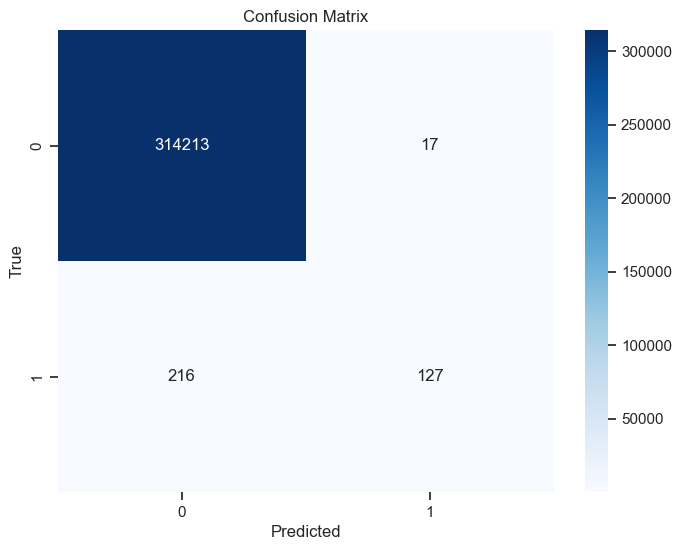

Decision Tree Classification Report:
              precision    recall  f1-score   support

   non_fraud      1.000     1.000     1.000    314230
    is_fraud      0.944     0.942     0.943       343

    accuracy                          1.000    314573
   macro avg      0.972     0.971     0.972    314573
weighted avg      1.000     1.000     1.000    314573



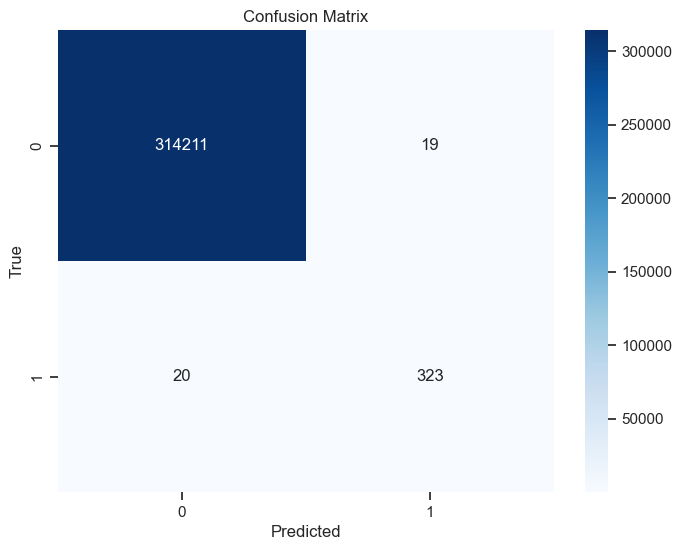

Random Forest Classification Report:
              precision    recall  f1-score   support

   non_fraud      1.000     1.000     1.000    314230
    is_fraud      0.997     0.980     0.988       343

    accuracy                          1.000    314573
   macro avg      0.999     0.990     0.994    314573
weighted avg      1.000     1.000     1.000    314573



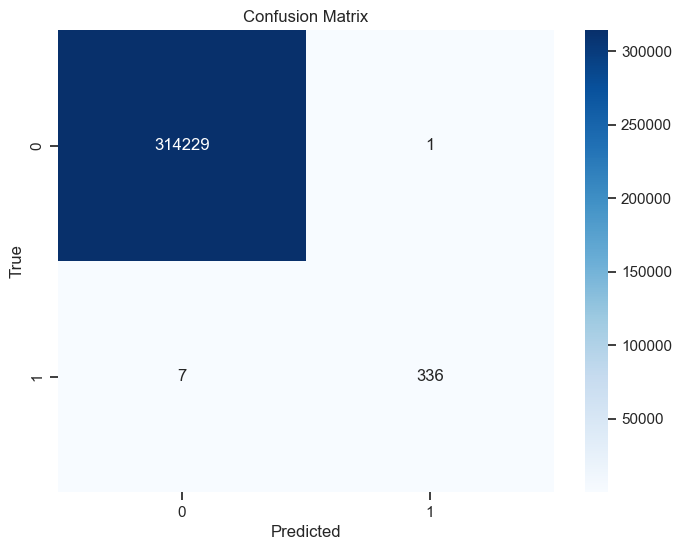

SVM Classification Report:
              precision    recall  f1-score   support

   non_fraud      0.999     1.000     1.000    314230
    is_fraud      0.973     0.525     0.682       343

    accuracy                          0.999    314573
   macro avg      0.986     0.762     0.841    314573
weighted avg      0.999     0.999     0.999    314573



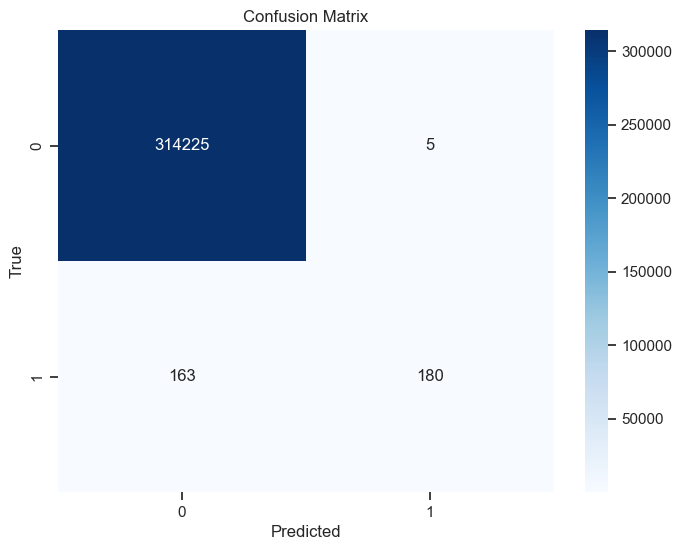

XGBoost Classification Report:
              precision    recall  f1-score   support

   non_fraud      1.000     1.000     1.000    314230
    is_fraud      0.959     0.880     0.918       343

    accuracy                          1.000    314573
   macro avg      0.979     0.940     0.959    314573
weighted avg      1.000     1.000     1.000    314573



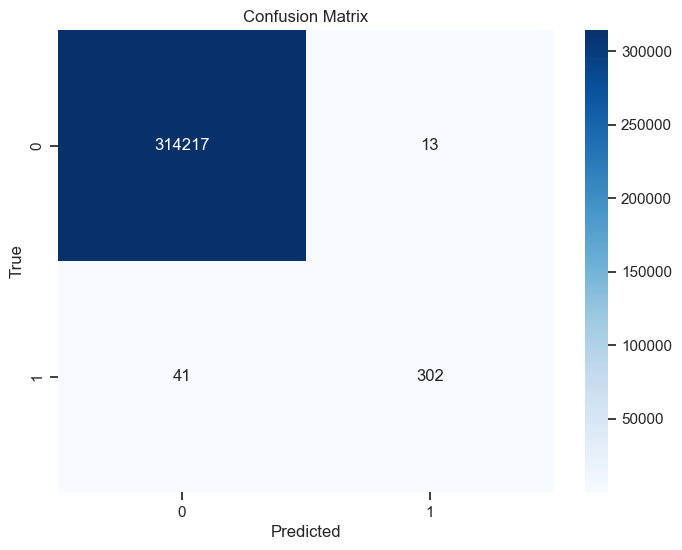

In [69]:
# create a list of model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost']
models = [lr_model, dc_model, rf_model, svm_model, xgb_model]

# Set the report labels
labels = ['non_fraud', 'is_fraud']

def plot_confusion_matrix(y_test, y_pred, labels):
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Set the desired number of decimal places
decimal_places = 3

# Then, you can call the function to plot the confusion matrix in your loop:
for i, model in enumerate(models):
    # predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)
    
    # generate the classification report
    report = classification_report(y_test, y_pred, target_names=labels, digits = decimal_places)
    print(f'{model_names[i]} Classification Report:\n{report}')
    
    # plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred, labels=[0, 1])

### Summary
*It is seen that Random Forest Classifier provides the balance measure correctly identifying Fraudulent cases(recall) with a percentage of 98% and minimizing false positives(precision) with a percentage of 99%. It also have a higher accuracy of 100% for prediction of Fraudulent transfers.*

### Hyperparameter Model Tuning using K-fold Cross Validation
Technique used is called K-fold Cross Validation to ensure that the model does not overfit to the training data, it's essential to validate it on a seperate data. One way to do that is by splitting the training data into a training set and a validation set.

In [70]:
from sklearn.model_selection import cross_val_score

# As Random Forest Classifier is the best model
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv = 5) # you can adjust the number of folds as needed
print('Cross-validation Scores on Training Set:', cv_scores)
print('Mean CV Score on Training Set:', cv_scores.mean().round(2))

Cross-validation Scores on Training Set: [0.99998638 0.99997956 0.99995913 0.99995913 0.99997956]
Mean CV Score on Training Set: 1.0


*It shows that the Random Forest model is able to generalize well on a new dataset based on the performance and vaildation score of the model with an average cv_score of 1.0*

### Recommendations
* Customers should be encouraged to use debits more to facilitate cashless policy
* Fraudulent Cash-outs should be looked into since majority of fraudulent cases are cash-outs
* Random Forest Classifier should be used to predict online payment fraud because it has a higher accuracy of 100% for prediction of Fraudulent transfers